# Clustering Categorical Data and Dimensional Reduction 

## Import the relevant libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
from sklearn.cluster import KMeans

from sklearn.manifold import MDS
import mpl_toolkits.mplot3d
import random

## From https://stackoverflow.com/questions/10374930/matplotlib-annotating-a-3d-scatter-plot
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation

## Load the data

In [18]:
raw_data = pd.read_csv('Data for Clustering - Density.txt')
raw_data

,Partido,Count_Words,Count_Different,PRR,administração pública,alterações climáticas,animais companhia,animal,apoio,apoios sociais,...,trabalho,ue,vez mais,vida,violência doméstica,é,é fundamental,é necessário,é preciso,é preciso mudar
0,AD,22923,120,4929.546743,741.613227,218.121537,43.624307,348.994460,3751.690442,697.988919,...,3402.695982,697.988919,218.121537,1526.850761,392.618767,6325.524582,392.618767,610.740304,697.988919,567.115997
1,BE,36826,133,0.000000,896.106012,407.320915,27.154728,1004.724923,2851.246402,135.773638,...,4181.828056,271.547276,353.011459,1547.819475,271.547276,9558.464129,135.773638,651.713463,678.868191,0.000000
2,CH,32017,126,0.000000,530.967923,0.000000,374.800887,1374.269919,2842.240060,249.867258,...,2248.805322,687.134960,562.201331,1592.903770,187.400444,8026.985664,281.100665,93.700222,93.700222,0.000000
3,IL,38357,127,0.000000,1486.039054,208.566885,26.070861,312.850327,1147.117866,52.141721,...,2528.873478,1199.259588,808.196679,1772.818521,130.354303,12435.800506,625.700654,677.842376,312.850327,0.000000
4,L,33815,131,118.290699,650.598847,621.026172,207.008724,1271.625018,4613.337276,236.581399,...,3755.729706,591.453497,147.863374,2158.805264,266.154074,3844.447730,29.572675,295.726748,118.290699,0.000000
5,PAN,17323,117,0.000000,404.087052,1096.807712,1327.714599,9755.815967,4502.684293,57.726722,...,2944.062807,1269.987877,230.906887,1385.441321,1154.534434,3001.789528,115.453443,0.000000,57.726722,0.000000
6,PCP,22598,124,44.251704,796.530666,88.503407,0.000000,88.503407,4026.905036,44.251704,...,7567.041331,929.285778,309.761926,4159.660147,132.755111,5354.456147,88.503407,177.006815,442.517037,0.000000
7,PS,25760,124,0.000000,1009.316770,543.478261,77.639752,465.838509,4619.565217,155.279503,...,2795.031056,1086.956522,388.198758,1940.993789,271.739130,5822.981366,232.919255,349.378882,310.559006,0.000000


## Select the features

In [19]:
x = raw_data.iloc[:,1:len(raw_data.columns)]
x

,Count_Words,Count_Different,PRR,administração pública,alterações climáticas,animais companhia,animal,apoio,apoios sociais,assegurar,...,trabalho,ue,vez mais,vida,violência doméstica,é,é fundamental,é necessário,é preciso,é preciso mudar
0,22923,120,4929.546743,741.613227,218.121537,43.624307,348.994460,3751.690442,697.988919,1657.723684,...,3402.695982,697.988919,218.121537,1526.850761,392.618767,6325.524582,392.618767,610.740304,697.988919,567.115997
1,36826,133,0.000000,896.106012,407.320915,27.154728,1004.724923,2851.246402,135.773638,624.558736,...,4181.828056,271.547276,353.011459,1547.819475,271.547276,9558.464129,135.773638,651.713463,678.868191,0.000000
2,32017,126,0.000000,530.967923,0.000000,374.800887,1374.269919,2842.240060,249.867258,3997.876128,...,2248.805322,687.134960,562.201331,1592.903770,187.400444,8026.985664,281.100665,93.700222,93.700222,0.000000
3,38357,127,0.000000,1486.039054,208.566885,26.070861,312.850327,1147.117866,52.141721,1486.039054,...,2528.873478,1199.259588,808.196679,1772.818521,130.354303,12435.800506,625.700654,677.842376,312.850327,0.000000
4,33815,131,118.290699,650.598847,621.026172,207.008724,1271.625018,4613.337276,236.581399,3312.139583,...,3755.729706,591.453497,147.863374,2158.805264,266.154074,3844.447730,29.572675,295.726748,118.290699,0.000000
5,17323,117,0.000000,404.087052,1096.807712,1327.714599,9755.815967,4502.684293,57.726722,6580.846274,...,2944.062807,1269.987877,230.906887,1385.441321,1154.534434,3001.789528,115.453443,0.000000,57.726722,0.000000
6,22598,124,44.251704,796.530666,88.503407,0.000000,88.503407,4026.905036,44.251704,4026.905036,...,7567.041331,929.285778,309.761926,4159.660147,132.755111,5354.456147,88.503407,177.006815,442.517037,0.000000
7,25760,124,0.000000,1009.316770,543.478261,77.639752,465.838509,4619.565217,155.279503,4309.006211,...,2795.031056,1086.956522,388.198758,1940.993789,271.739130,5822.981366,232.919255,349.378882,310.559006,0.000000


## Clustering

In [20]:
distortions = []
K = range(1,7)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    distortions.append(kmeans.inertia_)    

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


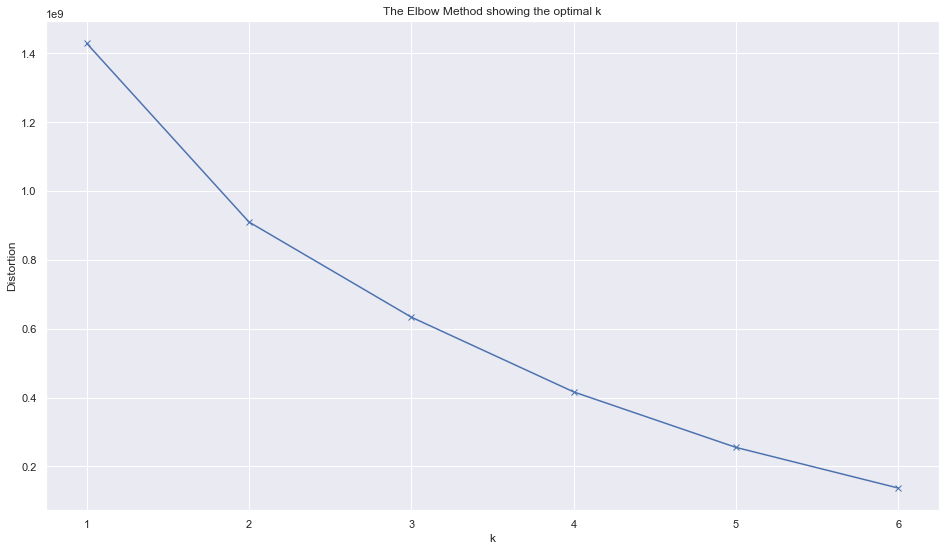

In [21]:
plt.figure(figsize=(16,9))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()    

## Clustering results

In [22]:
K = range(2,6)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    identified_clusters = kmeans.fit_predict(x)
    parties=raw_data['Partido'].tolist() 
    identified_clusters
    print(np.vstack((parties, identified_clusters)).T)

[['AD' '0']
 ['BE' '1']
 ['CH' '1']
 ['IL' '1']
 ['L' '1']
 ['PAN' '0']
 ['PCP' '0']
 ['PS' '0']]
[['AD' '2']
 ['BE' '1']
 ['CH' '1']
 ['IL' '1']
 ['L' '1']
 ['PAN' '0']
 ['PCP' '2']
 ['PS' '2']]
[['AD' '0']
 ['BE' '1']
 ['CH' '0']
 ['IL' '1']
 ['L' '0']
 ['PAN' '2']
 ['PCP' '3']
 ['PS' '0']]
[['AD' '0']
 ['BE' '1']
 ['CH' '4']
 ['IL' '1']
 ['L' '4']
 ['PAN' '2']
 ['PCP' '3']
 ['PS' '0']]


In [23]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
import scipy.spatial as sp, scipy.cluster.hierarchy as hc

x.index=raw_data['Partido'].tolist()
pwdist = pdist(x, metric='euclidean')

## Create a square dataframe with the pairwise distances: the distance matrix
distmat = pd.DataFrame(
    squareform(pwdist), # pass a symmetric distance matrix
    columns = x.index,
    index = x.index
)

## Normalise by scaling between 0-1, using dataframe max value to keep the symmetry.
## This is essentially a cosmetic step to 

distmat_mm=((distmat-distmat.min().min())/(distmat.max().max()-distmat.min().min()))*1


## Affinity matrix
affinmat_mm = pd.DataFrame(1-distmat_mm, distmat.index, distmat.columns)

#pd.DataFrame(distmat_mm, distmat.index, distmat.columns)

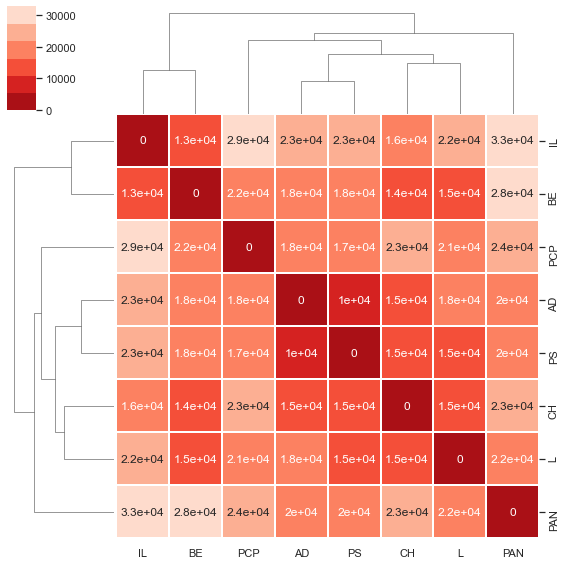

In [24]:
## Perform hierarchical linkage on the distance matrix using Ward's method.
distmat_link = hc.linkage(pwdist, method="ward", optimal_ordering=True )

sns.clustermap(
    distmat,
    annot = True,
    cmap=sns.color_palette("Reds_r"),
    linewidth=1,
    #standard_scale=1,
    row_linkage=distmat_link,
    col_linkage=distmat_link,
    figsize=(8,8)).fig ##.suptitle('Portuguese Parties Programs/Manifest, Clustermap')

plt.show()

## Dimensional reduction to 1, 2, 3 and 4 dimensions

In [25]:
mds = MDS(n_components=1, dissimilarity='precomputed',random_state=2020, n_init=100, max_iter=1000)

## We use the normalised distance matrix but results would
## be similar with the original one, just with a different scale/axis
results = mds.fit(distmat_mm.values)

ExportMDS = pd.DataFrame(columns = ['Partido', '1Dimension1'])

for i in range(len(raw_data['Partido'])):
    ExportMDS = ExportMDS.append({'Partido': parties[i], 
                      '1Dimension1' : results.embedding_[i][0]},
                      ignore_index = True)

ExportMDS.to_csv('MDS Data.txt', index=True, mode='w', header=True, encoding='utf-8-sig')    
    
ExportMDS.sort_values(by=['1Dimension1'])

,Partido,1Dimension1
3,IL,-0.606189
1,BE,-0.385790
0,AD,-0.154718
7,PS,-0.059419
2,CH,-0.004309
4,L,0.159748
6,PCP,0.404066
5,PAN,0.646611


In [26]:
mds = MDS(n_components=2, dissimilarity='precomputed',random_state=2020, n_init=100, max_iter=1000)

## We use the normalised distance matrix but results would
## be similar with the original one, just with a different scale/axis
results = mds.fit(distmat_mm.values)
coords = results.embedding_

ExportMDS['2Dimension1'] = coords[:,0]
ExportMDS['2Dimension2'] = coords[:,1]
ExportMDS.to_csv('MDS Data.txt', index=True, mode='w', header=True, encoding='utf-8-sig')    
ExportMDS

,Partido,1Dimension1,2Dimension1,2Dimension2
0,AD,-0.154718,-0.110305,0.155741
1,BE,-0.385790,-0.294624,-0.185281
2,CH,-0.004309,0.036107,-0.264599
3,IL,-0.606189,-0.289736,-0.485529
4,L,0.159748,0.303646,-0.172212
5,PAN,0.646611,0.453378,0.381153
6,PCP,0.404066,-0.193896,0.468115
7,PS,-0.059419,0.095429,0.102611


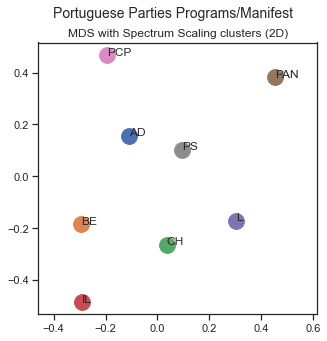

In [27]:
sns.set()
sns.set_style("ticks")

fig, ax = plt.subplots(figsize=(5,5))
fig.suptitle('Portuguese Parties Programs/Manifest', fontsize=14)
ax.set_title('MDS with Spectrum Scaling clusters (2D)')

for label, x, y in zip(distmat_mm.columns, coords[:, 0], coords[:, 1]):
    ax.scatter(x, y, s=250)
    ax.axis('equal')
    ax.annotate(label,xy = (x, y))

plt.show()

In [28]:
class Annotation3D(Annotation):
    '''Annotate the point xyz with text s'''

    def __init__(self, s, xyz, *args, **kwargs):
        Annotation.__init__(self,s, xy=(0,0), *args, **kwargs)
        self._verts3d = xyz        

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.xy=(xs,ys)
        Annotation.draw(self, renderer)
        
def annotate3D(ax, s, *args, **kwargs):
    '''add anotation text s to to Axes3d ax'''

    tag = Annotation3D(s, *args, **kwargs)
    ax.add_artist(tag)
mds = MDS(n_components=3, dissimilarity='precomputed',random_state=1234, n_init=100, max_iter=1000)
results = mds.fit(distmat.values)
parties = distmat.columns
coords = results.embedding_

ExportMDS['3Dimension1'] = coords[:,0]
ExportMDS['3Dimension2'] = coords[:,1]
ExportMDS['3Dimension3'] = coords[:,2]
ExportMDS.to_csv('MDS Data.txt', index=True, mode='w', header=True, encoding='utf-8-sig')    
ExportMDS

,Partido,1Dimension1,2Dimension1,2Dimension2,3Dimension1,3Dimension2,3Dimension3
0,AD,-0.154718,-0.110305,0.155741,7229.560668,-100.377799,-7154.875549
1,BE,-0.385790,-0.294624,-0.185281,-10134.165882,-4861.058922,-1626.499182
2,CH,-0.004309,0.036107,-0.264599,-4260.055362,7812.525264,-3173.838504
3,IL,-0.606189,-0.289736,-0.485529,-13912.603107,589.909200,-11282.053630
4,L,0.159748,0.303646,-0.172212,-5289.133590,1093.502518,9300.578057
5,PAN,0.646611,0.453378,0.381153,12961.519116,9757.063059,10150.643237
6,PCP,0.404066,-0.193896,0.468115,7837.159574,-13647.091969,3911.714254
7,PS,-0.059419,0.095429,0.102611,5567.718582,-644.471352,-125.668683


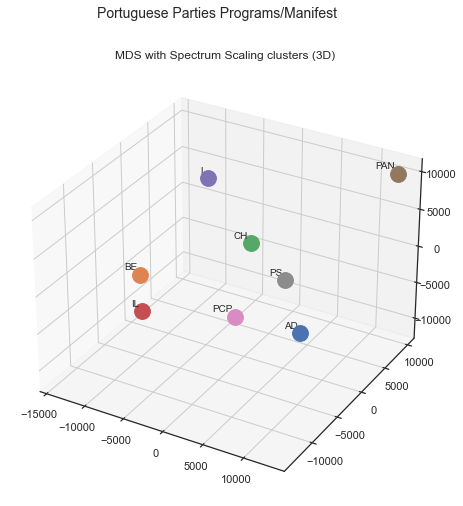

In [29]:
sns.set()
sns.set_style("ticks")

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

fig.suptitle('Portuguese Parties Programs/Manifest', fontsize=14)
ax.set_title('MDS with Spectrum Scaling clusters (3D)')

for label, x, y, z in zip(parties, coords[:, 0], coords[:, 1], coords[:, 2]):
    #print(label,pmds_colors[label])
    ax.scatter(x, y, z, s=250)
    annotate3D(ax, s=str(label), xyz=[x,y,z], fontsize=10, xytext=(-3,3),
               textcoords='offset points', ha='right',va='bottom')  
plt.show()

In [30]:
mds = MDS(n_components=4, dissimilarity='precomputed',random_state=2020, n_init=100, max_iter=1000)

## We use the normalised distance matrix but results would
## be similar with the original one, just with a different scale/axis
results = mds.fit(distmat_mm.values)
coords = results.embedding_

ExportMDS['4Dimension1'] = coords[:,0]
ExportMDS['4Dimension2'] = coords[:,1]
ExportMDS['4Dimension3'] = coords[:,2]
ExportMDS['4Dimension4'] = coords[:,3]
ExportMDS.to_csv('MDS Data.txt', index=True, mode='w', header=True, encoding='utf-8-sig')    
ExportMDS

,Partido,1Dimension1,2Dimension1,2Dimension2,3Dimension1,3Dimension2,3Dimension3,4Dimension1,4Dimension2,4Dimension3,4Dimension4
0,AD,-0.154718,-0.110305,0.155741,7229.560668,-100.377799,-7154.875549,-0.264746,-0.116456,-0.106585,0.050854
1,BE,-0.385790,-0.294624,-0.185281,-10134.165882,-4861.058922,-1626.499182,0.201974,0.194203,-0.215078,-0.031357
2,CH,-0.004309,0.036107,-0.264599,-4260.055362,7812.525264,-3173.838504,-0.106239,0.206282,-0.025314,-0.180216
3,IL,-0.606189,-0.289736,-0.485529,-13912.603107,589.909200,-11282.053630,0.154804,0.055782,-0.300127,-0.403829
4,L,0.159748,0.303646,-0.172212,-5289.133590,1093.502518,9300.578057,0.108035,0.242411,0.183612,0.108724
5,PAN,0.646611,0.453378,0.381153,12961.519116,9757.063059,10150.643237,-0.056372,-0.273228,0.493685,-0.058675
6,PCP,0.404066,-0.193896,0.468115,7837.159574,-13647.091969,3911.714254,0.142214,-0.292779,-0.082710,0.350516
7,PS,-0.059419,0.095429,0.102611,5567.718582,-644.471352,-125.668683,-0.179670,-0.016215,0.052519,0.163983


In [31]:
from sklearn.manifold import MDS
import mpl_toolkits.mplot3d
import random

distortions = []
K = range(1,6)
for k in K:
    mds = MDS(n_components=k, dissimilarity='precomputed',random_state=1234, n_init=100, max_iter=1000)
    results = mds.fit(distmat.values)
    distortions.append(mds.stress_)

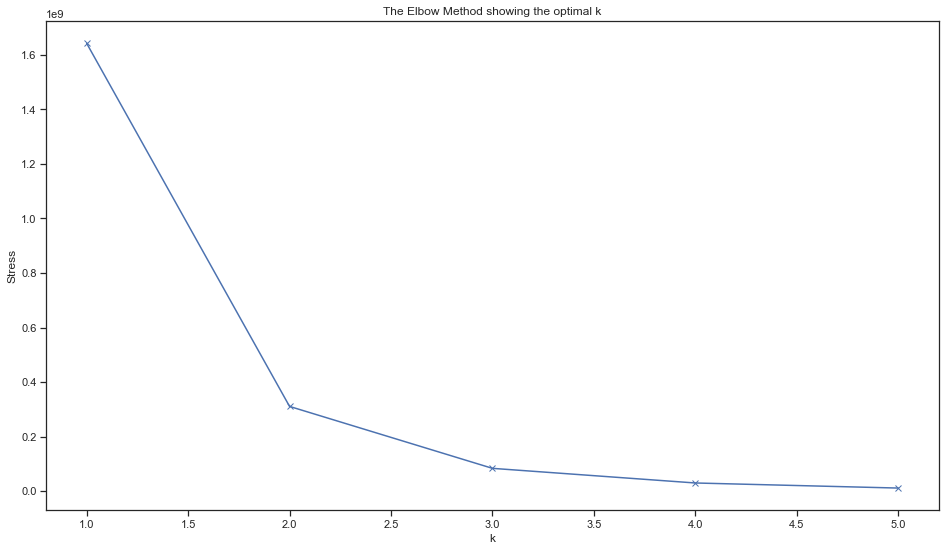

In [32]:
plt.figure(figsize=(16,9))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Stress')
plt.title('The Elbow Method showing the optimal k')
plt.show()